In [2]:
#!pip install pandas

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.9.1 requires absl-py>=1.0.0, which is not installed.
tensorflow-gpu 2.9.1 requires astunparse>=1.6.0, which is not installed.
tensorflow-gpu 2.9.1 requires flatbuffers<2,>=1.12, which is not installed.
tensorflow-gpu 2.9.1 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow-gpu 2.9.1 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.9.1 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow-gpu 2.9.1 requires h5py>=2.9.0, which is not installed.
tensorflow-gpu 2.9.1 requires keras<2.10.0,>=2.9.0rc0, which is not installed.
tensorflow-gpu 2.9.1 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow-gpu 2.9.1 requires libclang>=13.0.0, which is not installed.
tensorflow-gpu 2.9.1 requires opt-einsum>=2.3.2, which is not installed.
tensorfl

     ---------------------------------------- 10.6/10.6 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 4.7 MB/s eta 0:00:00


In [4]:
#!pip install Bio

  Using cached bio-1.4.0-py3-none-any.whl (270 kB)
     ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00
  Using cached mygene-3.2.2-py2.py3-none-any.whl (5.4 kB)
  Using cached biopython-1.79-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached biothings_client-0.2.6-py2.py3-none-any.whl (37 kB)


In [6]:
#!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 950.4/950.4 kB 6.7 MB/s eta 0:00:00


In [8]:
#!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 3.9 MB/s eta 0:00:00


In [10]:
#!pip install scikit-learn

     ---------------------------------------- 7.4/7.4 MB 6.4 MB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [11]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
%matplotlib inline

In [12]:
metadata = pd.read_csv(r'C:\Users\harsh\Downloads\Dissertation\V95_38_MUTANT.csv')

In [13]:
data = r'C:\Users\harsh\Downloads\Dissertation\All_COSMIC_Genes\All_COSMIC_Genes.fasta'

In [14]:
sequences = [i for i in SeqIO.parse(data,'fasta')]

In [15]:
description = []
pros_sequence = []
for sequence in sequences:
    description.append(sequence.description)
    pros_sequence.append(str(sequence.seq))

In [16]:
sequencepd = pd.DataFrame({'Description':description, 'Sequence': pros_sequence})
sequencepd

,Description,Sequence
0,OR4F5_ENST00000641515 ENST00000641515.2 1:6541...,atgaagaaggtaactgcagaggctatttcctggaatgaatcaacga...
1,OR4F5 ENST00000335137.4 1:69055-70108(+),atggtgactgaattcatttttctgggtctctctgattctcaggaac...
2,OR4F29 ENST00000426406.3 1:450703-451697(-),atggatggagagaatcactcagtggtatctgagtttttgtttctgg...
3,OR4F16 ENST00000332831.4 1:685679-686673(-),atggatggagagaatcactcagtggtatctgagtttttgtttctgg...
4,SAMD11 ENST00000342066.7 1:925738-944575(+),atgtccaaggggatcctgcaggtgcatcctccgatctgcgactgcc...
...,...,...
56469,MT-ND4L ENST00000361335.1 25:10470-10766(+),atgcccctcatttacataaatattatactagcatttaccatctcac...
56470,MT-ND4 ENST00000361381.2 25:10760-12137(+),atgctaaaactaatcgtcccaacaattatattactaccactgacat...
56471,MT-ND5 ENST00000361567.2 25:12337-14148(+),ataaccatgcacactactataaccaccctaaccctgacttccctaa...
56472,MT-ND6 ENST00000361681.2 25:14149-14673(-),atgatgtatgctttgtttctgttgagtgtgggtttagtaatggggt...


In [17]:
pat = '|'.join(r"\b{}\b".format(x) for x in metadata[' ACCESSION_NUMBER'])
sequencepd['Accession_number']= sequencepd['Description'].str.extract('('+ pat + ')', expand=False)
print (sequencepd)

                                             Description  \
0      OR4F5_ENST00000641515 ENST00000641515.2 1:6541...   
1               OR4F5 ENST00000335137.4 1:69055-70108(+)   
2            OR4F29 ENST00000426406.3 1:450703-451697(-)   
3            OR4F16 ENST00000332831.4 1:685679-686673(-)   
4            SAMD11 ENST00000342066.7 1:925738-944575(+)   
...                                                  ...   
56469        MT-ND4L ENST00000361335.1 25:10470-10766(+)   
56470         MT-ND4 ENST00000361381.2 25:10760-12137(+)   
56471         MT-ND5 ENST00000361567.2 25:12337-14148(+)   
56472         MT-ND6 ENST00000361681.2 25:14149-14673(-)   
56473         MT-CYB ENST00000361789.2 25:14747-15887(+)   

                                                Sequence   Accession_number  
0      atgaagaaggtaactgcagaggctatttcctggaatgaatcaacga...  ENST00000641515.2  
1      atggtgactgaattcatttttctgggtctctctgattctcaggaac...                NaN  
2      atggatggagagaatcactcagtggtatctgagttttt

In [18]:
sequencepd

,Description,Sequence,Accession_number
0,OR4F5_ENST00000641515 ENST00000641515.2 1:6541...,atgaagaaggtaactgcagaggctatttcctggaatgaatcaacga...,ENST00000641515.2
1,OR4F5 ENST00000335137.4 1:69055-70108(+),atggtgactgaattcatttttctgggtctctctgattctcaggaac...,NaN
2,OR4F29 ENST00000426406.3 1:450703-451697(-),atggatggagagaatcactcagtggtatctgagtttttgtttctgg...,NaN
3,OR4F16 ENST00000332831.4 1:685679-686673(-),atggatggagagaatcactcagtggtatctgagtttttgtttctgg...,NaN
4,SAMD11 ENST00000342066.7 1:925738-944575(+),atgtccaaggggatcctgcaggtgcatcctccgatctgcgactgcc...,ENST00000342066.7
...,...,...,...
56469,MT-ND4L ENST00000361335.1 25:10470-10766(+),atgcccctcatttacataaatattatactagcatttaccatctcac...,NaN
56470,MT-ND4 ENST00000361381.2 25:10760-12137(+),atgctaaaactaatcgtcccaacaattatattactaccactgacat...,ENST00000361381.2
56471,MT-ND5 ENST00000361567.2 25:12337-14148(+),ataaccatgcacactactataaccaccctaaccctgacttccctaa...,ENST00000361567.2
56472,MT-ND6 ENST00000361681.2 25:14149-14673(-),atgatgtatgctttgtttctgttgagtgtgggtttagtaatggggt...,NaN


In [19]:
sequencepd['Sequence'] = sequencepd['Sequence'].str.replace(' |\n', '')

C:\Users\harsh\AppData\Local\Temp\ipykernel_4232\297800821.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sequencepd['Sequence'] = sequencepd['Sequence'].str.replace(' |\n', '')


In [20]:
#sequencepd.to_csv(r'C:\Users\harsh\Downloads\Dissertation\full.csv',index=False)

In [21]:
sequencepd['Accession_number'].isnull().sum()

1301

In [22]:
sequencepd.loc[sequencepd['Accession_number']=='ENST00000641515.2']

,Description,Sequence,Accession_number
0,OR4F5_ENST00000641515 ENST00000641515.2 1:6541...,atgaagaaggtaactgcagaggctatttcctggaatgaatcaacga...,ENST00000641515.2


In [23]:
metadata.loc[metadata[' ACCESSION_NUMBER']=='ENST00000641515.2']

,GENE_NAME,ACCESSION_NUMBER,GENE_CDS_LENGTH,HGNC_ID,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,...,FATHMM_SCORE,MUTATION_SOMATIC_STATUS,PUBMED_PMID,ID_STUDY,SAMPLE_TYPE,TUMOUR_ORIGIN,AGE,HGVSP,HGVSC,HGVSG
1385158,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,CPCG0346-F1,2340648,2205631,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,537.0,NS,primary,NaN,NaN,ENST00000641515.2:c.9+601_9+602del,1:g.66174_66175del
1385477,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,CPCG0103-F1,2121422,1995658,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,537.0,NS,NS,NaN,NaN,ENST00000641515.2:c.9+793_9+805delinsTATATTTT,1:g.66366_66378delinsTATATTTT
1386981,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0026_CRUK_PC_0026_T1_DNA,2457564,2320401,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,65.0,NaN,ENST00000641515.2:c.9+1005_9+1006insTATATTATAT...,1:g.66578_66579insTATATTATATAAATATATT
1419329,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0031_CRUK_PC_0031_T1_DNA,2457557,2320394,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,66.0,NaN,ENST00000641515.2:c.9+1005_9+1006insTATATTATAT...,1:g.66578_66579insTATATTATATAAATATATT
1423713,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0194_CRUK_PC_0194_T1_DNA,2634997,2495393,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,53.0,NaN,ENST00000641515.2:c.9+949_9+950insATATA,1:g.66522_66523insATATA
1477768,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0237_CRUK_PC_0237_T1_DNA,2635061,2495457,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,57.0,NaN,ENST00000641515.2:c.9+949_9+950insATATA,1:g.66522_66523insATATA
1503111,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,CPCG0182-F1,2340853,2205836,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,537.0,NS,primary,NaN,NaN,ENST00000641515.2:c.9+1009_9+1010insTATATAAATA...,1:g.66582_66583insTATATAAATATATTTATAT
1519068,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0048_CRUK_PC_0048_T1_DNA,2457581,2320418,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,58.0,NaN,ENST00000641515.2:c.9+949_9+950insATATA,1:g.66522_66523insATATA
1545746,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,CPCG_0183_Pr_P_F0,2121447,1995683,prostate,NS,NS,...,0.00508,Confirmed somatic variant,NaN,537.0,NS,NS,NaN,NaN,ENST00000641515.2:c.9+800A>T,1:g.66373A>T
1578037,OR4F5_ENST00000641515,ENST00000641515.2,981,14825.0,0195_CRUK_PC_0195_T1_DNA,2634998,2495394,prostate,NS,NS,...,NaN,Confirmed somatic variant,NaN,538.0,NS,primary,55.0,NaN,ENST00000641515.2:c.9+949_9+950insATATA,1:g.66522_66523insATATA


In [24]:
sequencepd.rename(columns={'Accession_number':' ACCESSION_NUMBER'}, inplace=True)
df1 = metadata.merge(sequencepd, on=' ACCESSION_NUMBER', how='left')
df1

,GENE_NAME,ACCESSION_NUMBER,GENE_CDS_LENGTH,HGNC_ID,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,...,PUBMED_PMID,ID_STUDY,SAMPLE_TYPE,TUMOUR_ORIGIN,AGE,HGVSP,HGVSC,HGVSG,Description,Sequence
0,MFN2_ENST00000444836,ENST00000444836.5,2274,16877.0,P01-28,1691446,1599713,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,61.0,ENSP00000416338.1:p.Glu73=,ENST00000444836.5:c.219A>G,1:g.11992598A>G,MFN2_ENST00000444836 ENST00000444836.5 1:11980...,atgtccctgctcttctctcgatgcaactctatcgtcacagtcaaga...
1,MFN2_ENST00000444836,ENST00000444836.5,2274,16877.0,TCGA-HC-A6AN-01,2262845,2129829,prostate,NS,NS,...,NaN,435.0,NS,primary,67.0,ENSP00000416338.1:p.Glu90=,ENST00000444836.5:c.270G>A,1:g.11992649G>A,MFN2_ENST00000444836 ENST00000444836.5 1:11980...,atgtccctgctcttctctcgatgcaactctatcgtcacagtcaaga...
2,SELP_ENST00000458599,ENST00000458599.6,1941,10721.0,PR-1701,1669605,1582897,prostate,NS,NS,...,21307934.0,NaN,fresh/frozen - NOS,primary,62.0,NaN,ENST00000458599.6:c.1886+210T>G,1:g.169591216A>C,SELP_ENST00000458599 ENST00000458599.6 1:16959...,atggccaactgccaaatagccatcttgtaccagagattccagagag...
3,CDH6,ENST00000265071.2,2373,1765.0,PR-09-3566,1691530,1599797,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,65.0,ENSP00000265071.2:p.Trp57Arg,ENST00000265071.2:c.169T>A,5:g.31267642T>A,CDH6 ENST00000265071.2 5:31193750-31329146(+),atgagaacttaccgctacttcttgctgctcttttgggtgggccagc...
4,NCOR2_ENST00000404621,ENST00000404621.5,7377,7673.0,PR-02-2072,1691505,1599772,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,54.0,ENSP00000384202.1:p.Pro164=,ENST00000404621.5:c.492G>A,12:g.124473051C>T,NCOR2_ENST00000404621 ENST00000404621.5 12:124...,atgtcgggatccacacagcctgtggcacagacgtggagggccactg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788999,SERINC5_ENST00000509193,ENST00000509193.5,1263,18825.0,DA13003,2634953,2495349,prostate,NS,NS,...,NaN,675.0,NS,primary,67.0,NaN,ENST00000509193.5:c.1238+4989T>C,5:g.80141101A>G,SERINC5_ENST00000509193 ENST00000509193.5 5:80...,atgtcagctcagtgctgtgcgggccagctggcctgctgctgtgggt...
2789000,CHEK2_ENST00000402731,ENST00000402731.5,1545,16627.0,2860310,2860310,2715598,prostate,NS,NS,...,32300177.0,NaN,surgery-fixed,NS,61.0,ENSP00000384835.1:p.Ala363=,ENST00000402731.5:c.1089G>T,22:g.28695793C>A,CHEK2_ENST00000402731 ENST00000402731.5 22:286...,atgtctcgggagtcggatgttgaggctcagcagtctcatggcagca...
2789001,CAMK2D_ENST00000394524,ENST00000394524.7,1437,1462.0,EOPC-174_tumor_01,2633755,2494151,prostate,NS,NS,...,NaN,534.0,NS,primary,52.0,NaN,ENST00000394524.7:c.161-38748G>A,4:g.113700520C>T,CAMK2D_ENST00000394524 ENST00000394524.7 4:113...,atggcttcgaccacaacctgcaccaggttcacggacgagtatcagc...
2789002,PCDH15_ENST00000395440,ENST00000395440.5,2160,14674.0,EOPC-174_tumor_01,2633755,2494151,prostate,NS,NS,...,NaN,534.0,NS,primary,52.0,NaN,ENST00000395440.5:c.91+58200G>A,10:g.54605972C>T,PCDH15_ENST00000395440 ENST00000395440.5 10:53...,atgtttcgacagttttatctctggacatgtttagcttcagggatca...


In [25]:
df1['Sequence'].isna().sum()

0

In [26]:
metadata[' ACCESSION_NUMBER'].nunique()

55173

In [27]:
# df1.to_csv(r'C:\Users\harsh\Downloads\Dissertation\full.csv',index=False)

In [28]:
df2 = df1.drop_duplicates(' ACCESSION_NUMBER')
df2

,GENE_NAME,ACCESSION_NUMBER,GENE_CDS_LENGTH,HGNC_ID,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,...,PUBMED_PMID,ID_STUDY,SAMPLE_TYPE,TUMOUR_ORIGIN,AGE,HGVSP,HGVSC,HGVSG,Description,Sequence
0,MFN2_ENST00000444836,ENST00000444836.5,2274,16877.0,P01-28,1691446,1599713,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,61.0,ENSP00000416338.1:p.Glu73=,ENST00000444836.5:c.219A>G,1:g.11992598A>G,MFN2_ENST00000444836 ENST00000444836.5 1:11980...,atgtccctgctcttctctcgatgcaactctatcgtcacagtcaaga...
2,SELP_ENST00000458599,ENST00000458599.6,1941,10721.0,PR-1701,1669605,1582897,prostate,NS,NS,...,21307934.0,NaN,fresh/frozen - NOS,primary,62.0,NaN,ENST00000458599.6:c.1886+210T>G,1:g.169591216A>C,SELP_ENST00000458599 ENST00000458599.6 1:16959...,atggccaactgccaaatagccatcttgtaccagagattccagagag...
3,CDH6,ENST00000265071.2,2373,1765.0,PR-09-3566,1691530,1599797,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,65.0,ENSP00000265071.2:p.Trp57Arg,ENST00000265071.2:c.169T>A,5:g.31267642T>A,CDH6 ENST00000265071.2 5:31193750-31329146(+),atgagaacttaccgctacttcttgctgctcttttgggtgggccagc...
4,NCOR2_ENST00000404621,ENST00000404621.5,7377,7673.0,PR-02-2072,1691505,1599772,prostate,NS,NS,...,22610119.0,NaN,surgery fresh/frozen,primary,54.0,ENSP00000384202.1:p.Pro164=,ENST00000404621.5:c.492G>A,12:g.124473051C>T,NCOR2_ENST00000404621 ENST00000404621.5 12:124...,atgtcgggatccacacagcctgtggcacagacgtggagggccactg...
13,MCF2L_ENST00000375604,ENST00000375604.6,3372,14576.0,CPCG0098-F1,2340647,2205630,prostate,NS,NS,...,NaN,537.0,NS,primary,NaN,NaN,ENST00000375604.6:c.364-1852A>T,13:g.113058741A>T,MCF2L_ENST00000375604 ENST00000375604.6 13:113...,atgacggtgcgccggctgtcactgctgtgccgggacctctgggcgc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770628,HIST1H3F,ENST00000618052.1,411,4773.0,05-165M1,2575159,2436496,prostate,NS,NS,...,26928463.0,NaN,autopsy - NOS,metastasis,69.0,ENSP00000484095.1:p.Ala76=,ENST00000618052.1:c.228G>A,6:g.26250378C>T,HIST1H3F ENST00000618052.1 6:26250195-26250605(-),atggcacgcacgaagcaaacagctcgtaagtccactggcggcaaag...
2772219,ZC3H11B,ENST00000636126.1,2418,25659.0,0085_CRUK_PC_0085_T1_DNA,2457600,2320437,prostate,NS,NS,...,NaN,538.0,NS,primary,61.0,ENSP00000489836.1:p.Arg510Ter,ENST00000636126.1:c.1528C>T,1:g.219610535G>A,ZC3H11B ENST00000636126.1 1:219608347-21961314...,atgcctaatcaaggagaagactgctatttttttttctattctacat...
2773048,MCRIP1_ENST00000457257,ENST00000457257.5,357,28007.0,CPCG0001-F1,2197576,2065854,prostate,NS,NS,...,NaN,537.0,NS,NS,NaN,ENSP00000408827.2:p.Phe60Leu,ENST00000457257.5:c.180C>A,17:g.81824297G>T,MCRIP1_ENST00000457257 ENST00000457257.5 17:81...,atgctgccacaccagaggctgaggggatctggcggtggagcgctag...
2774360,GNRH1,ENST00000276414.4,279,4419.0,0160_CRUK_PC_0160_T1_DNA,2634965,2495361,prostate,NS,NS,...,NaN,538.0,NS,primary,51.0,NaN,ENST00000276414.4:c.-589G>C,8:g.25423919C>G,GNRH1 ENST00000276414.4 8:25419262-25424654(-),atgaagccaattcaaaaactcctagctggccttattctactgactt...


In [29]:
# df2.to_csv(r'C:\Users\harsh\Downloads\Dissertation\final.csv',index=False)

In [30]:
# a = pd.concat(g for _, g in df2.groupby("Sequence") if len(g) > 1)
# a['Sequence'][0]

In [31]:
df2[df2.duplicated(keep=False)]

,GENE_NAME,ACCESSION_NUMBER,GENE_CDS_LENGTH,HGNC_ID,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,...,PUBMED_PMID,ID_STUDY,SAMPLE_TYPE,TUMOUR_ORIGIN,AGE,HGVSP,HGVSC,HGVSG,Description,Sequence


C:\Users\harsh\anaconda3\envs\Dissertation\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Primary Histology')

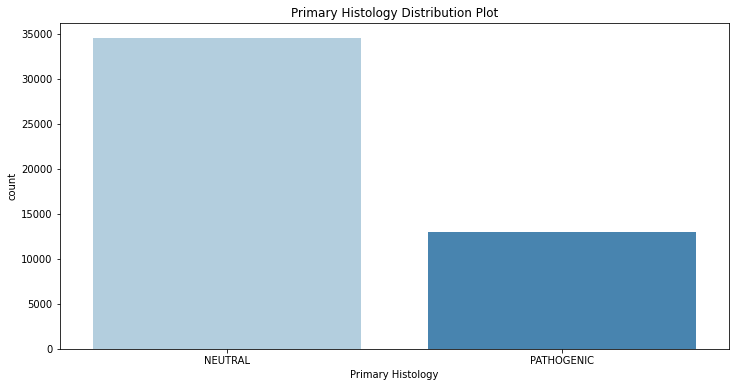

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(df2[' FATHMM_PREDICTION'],palette='Blues')
plt.title('Primary Histology Distribution Plot')
plt.xlabel('Primary Histology')

In [33]:
df2[' FATHMM_PREDICTION'].value_counts()

NEUTRAL       34514
PATHOGENIC    13033
Name:  FATHMM_PREDICTION, dtype: int64

In [34]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [35]:
df2['words'] = df2.apply(lambda x: getKmers(x['Sequence']), axis=1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_4232\70774303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['words'] = df2.apply(lambda x: getKmers(x['Sequence']), axis=1)


In [36]:
len(df2['words'][0])

2269

In [37]:
df2[' FATHMM_PREDICTION'].isna().sum()

7626

In [38]:
df2[' FATHMM_SCORE'].isna().sum()

5490

In [39]:
df2[' FATHMM_PREDICTION'].fillna("PATHOGENIC", inplace = True)
df2[' FATHMM_PREDICTION'].value_counts()

C:\Users\harsh\AppData\Local\Temp\ipykernel_4232\872097019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[' FATHMM_PREDICTION'].fillna("PATHOGENIC", inplace = True)


NEUTRAL       34514
PATHOGENIC    20659
Name:  FATHMM_PREDICTION, dtype: int64

In [40]:
df2[' FATHMM_SCORE'].describe()

count    49683.000000
mean         0.309524
std          0.389559
min          0.000000
25%          0.009600
50%          0.059040
75%          0.744045
max          0.999560
Name:  FATHMM_SCORE, dtype: float64

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df2[' FATHMM_PREDICTION'] = labelencoder_Y.fit_transform(df2[' FATHMM_PREDICTION'])
df2[' FATHMM_PREDICTION'].value_counts()

C:\Users\harsh\AppData\Local\Temp\ipykernel_4232\1563915797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[' FATHMM_PREDICTION'] = labelencoder_Y.fit_transform(df2[' FATHMM_PREDICTION'])


0    34514
1    20659
Name:  FATHMM_PREDICTION, dtype: int64

In [42]:
prostatedata = df2[['words', ' FATHMM_PREDICTION']].copy()
prostatedata.head()

,words,FATHMM_PREDICTION
0,"[atgtcc, tgtccc, gtccct, tccctg, ccctgc, cctgc...",1
2,"[atggcc, tggcca, ggccaa, gccaac, ccaact, caact...",0
3,"[atgaga, tgagaa, gagaac, agaact, gaactt, aactt...",1
4,"[atgtcg, tgtcgg, gtcggg, tcggga, cgggat, gggat...",0
13,"[atgacg, tgacgg, gacggt, acggtg, cggtgc, ggtgc...",0


In [43]:
prostatedata.rename({' FATHMM_PREDICTION': 'IsCancer', 'words': 'words'}, axis=1, inplace=True)
prostatedata.reset_index(drop=True,inplace=True)
prostatedata.head()

,words,IsCancer
0,"[atgtcc, tgtccc, gtccct, tccctg, ccctgc, cctgc...",1
1,"[atggcc, tggcca, ggccaa, gccaac, ccaact, caact...",0
2,"[atgaga, tgagaa, gagaac, agaact, gaactt, aactt...",1
3,"[atgtcg, tgtcgg, gtcggg, tcggga, cgggat, gggat...",0
4,"[atgacg, tgacgg, gacggt, acggtg, cggtgc, ggtgc...",0


In [44]:
texts = list(prostatedata['words'])
for item in range(len(texts)):
    texts[item] = ' '.join(texts[item])
y_data = prostatedata.iloc[:, 1].values 

In [45]:
print(texts[2])
print(y_data)

atgaga tgagaa gagaac agaact gaactt aactta acttac cttacc ttaccg taccgc accgct ccgcta cgctac gctact ctactt tacttc acttct cttctt ttcttg tcttgc cttgct ttgctg tgctgc gctgct ctgctc tgctct gctctt ctcttt tctttt cttttg ttttgg tttggg ttgggt tgggtg gggtgg ggtggg gtgggc tgggcc gggcca ggccag gccagc ccagcc cagccc agccct gcccta ccctac cctacc ctaccc taccca acccaa cccaac ccaact caactc aactct actctc ctctct tctctc ctctca tctcaa ctcaac tcaact caactc aactcc actcca ctccac tccact ccacta cactat actatc ctatca tatcaa atcaaa tcaaag caaaga aaagag aagagg agagga gaggac aggact ggacta gactag actagt ctagtg tagtgg agtggt gtggtt tggttt ggtttc gtttcc tttccc ttccca tcccag cccagc ccagca cagcaa agcaaa gcaaag caaaga aaagaa aagaaa agaaaa gaaaag aaaagg aaaggg aagggc agggcc gggccc ggccct gccctg ccctgg cctgga ctggag tggagc ggagct gagctc agctct gctctc ctctct tctctg ctctgg tctgga ctggaa tggaaa ggaaac gaaaca aaacag aacagc acagca cagcaa agcaaa gcaaaa caaaaa aaaaat aaaatg aaatga aatgag atgagc tgagct gagctg agctga gctgaa ctgaac tgaacc

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(texts)

In [47]:
#y=Validation/test labels;z = prediction scores
def plotROC(y,z,pstr=''):
    #fpr=false positive rate;tpr = true positive rate;tt = threshold 
    fpr,tpr,tt=roc_curve(y,z)
    #Find area under the curve for ROC
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(tt,fpr,'o--',tt,tpr,'x--');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(fpr,tpr,'o--');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

#y=Validation/test labels;z = prediction scores
def plotPRC(y,z,pstr=''):
    P, R, tt = precision_recall_curve(y,z)
    pr_auc = average_precision_score(y,z)
    plt.figure()
    plt.plot(tt,R[:-1],'o--',tt,P[:-1],'x--');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    plt.figure()
    plt.plot(R,P,'o--');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

In [48]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
nbclassifier = MultinomialNB(alpha=0.1)
# nbclassifier.fit(X_train, y_train)
#Initialising the startified k-fold CV with 5 folds
skf = StratifiedKFold(n_splits=5)
#Lists to hold, Accuracy, AUC-ROC, AUC-PR for all the 5 folds
accuracy_stratified = []
roc_auc_stratified = []
pr_auc_stratified = []
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(texts, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

Fold  0 Accuracy: 0.7555052106932487
Fold  0 AUC ROC: 0.8281038176787763
Fold  0 AUC PR: 0.7414115439006019
Fold  1 Accuracy: 0.7422745808790213
Fold  1 AUC ROC: 0.81765919569462
Fold  1 AUC PR: 0.720944735699113
Fold  2 Accuracy: 0.7650203896692342
Fold  2 AUC ROC: 0.8367455912023323
Fold  2 AUC PR: 0.7565939798984643
Fold  3 Accuracy: 0.7228566249773427
Fold  3 AUC ROC: 0.786697663008856
Fold  3 AUC PR: 0.6817014325809735
Fold  4 Accuracy: 0.7313757476889614
Fold  4 AUC ROC: 0.7944524731878719
Fold  4 AUC PR: 0.6931546321439989


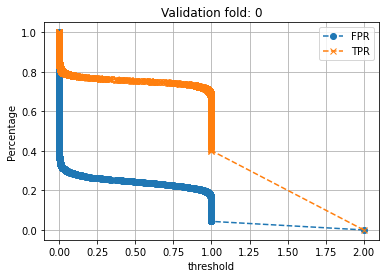

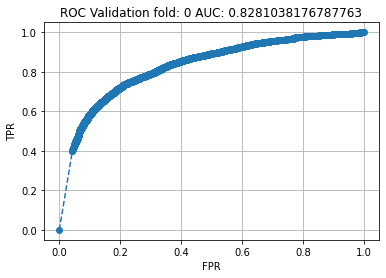

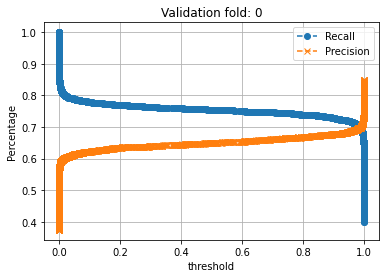

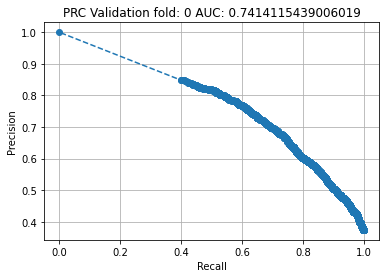

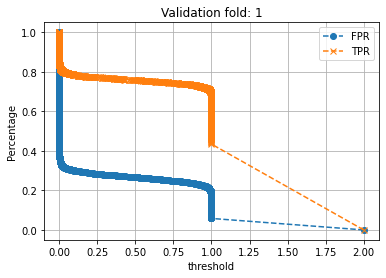

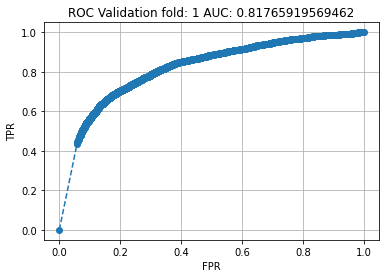

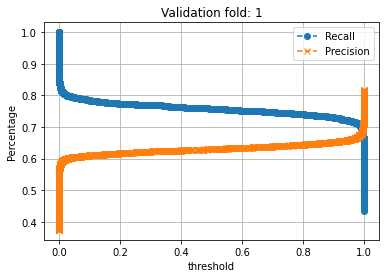

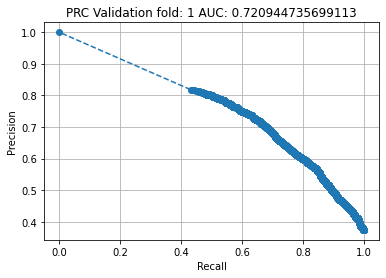

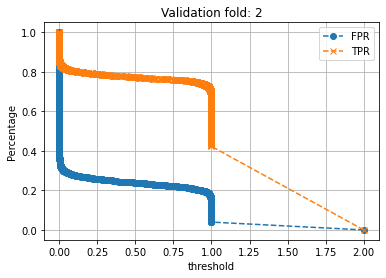

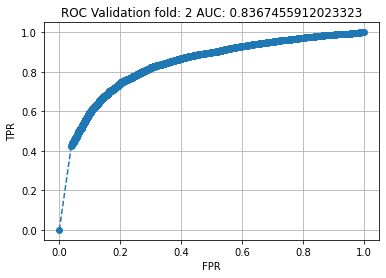

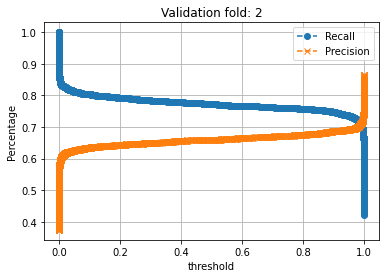

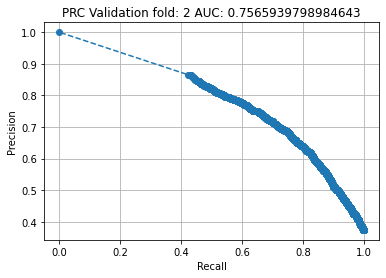

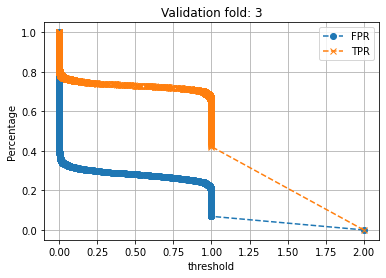

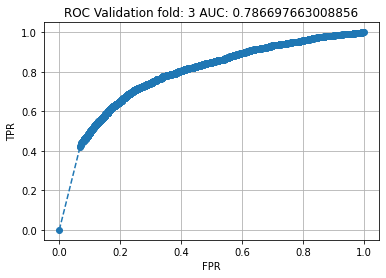

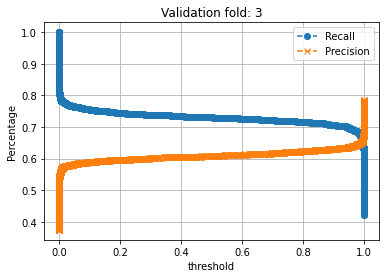

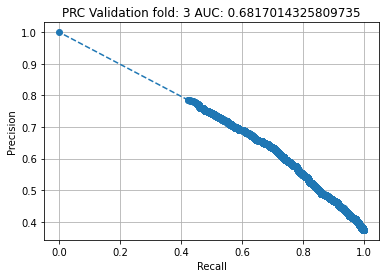

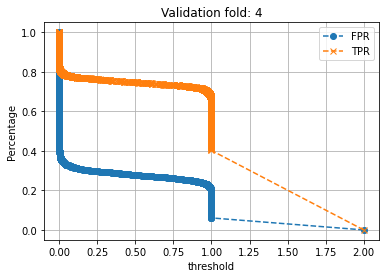

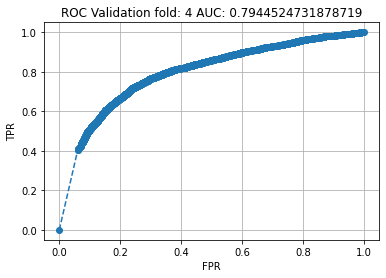

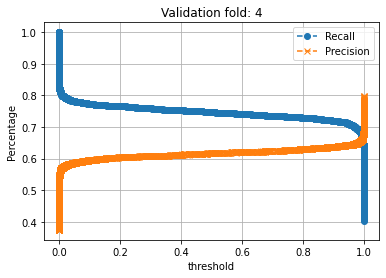

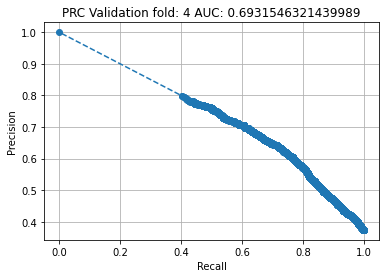

In [49]:
# X : Training data and y : Is the training labels
# Function to return the Accuracy, AUC-ROC, AUC-PR values in the form of list for all folds
def modeloutputmetrics(X,y):
    for i, (tr_idx, v_idx) in enumerate(skf.split(X, y)):
        Xtr, Xv = X[tr_idx], X[v_idx]
        ytr, yv = y[tr_idx], y[v_idx]
        #Fit the model
        nbclassifier.fit(Xtr, ytr)
        #Finding the score
        score_nb = nbclassifier.score(Xv,yv)
        accuracy_stratified.append(score_nb)
        print('Fold ',i,'Accuracy:',score_nb)
        #Predicting the scores on the validation set
        z = nbclassifier.predict_proba(Xv)[:,1]
        #Plotting AUC-ROC curve
        roc_auc = plotROC(yv,z,pstr='Validation fold: ' + str(i))
        roc_auc_stratified.append(roc_auc)
        print('Fold ',i,'AUC ROC:',roc_auc)
        #Plotting AUC-PR curves
        pr_auc = plotPRC(yv,z,pstr='Validation fold: ' + str(i))
        pr_auc_stratified.append(pr_auc)
        print('Fold ',i,'AUC PR:',pr_auc)
    return accuracy_stratified,roc_auc_stratified,pr_auc_stratified

# Calculating the Accuracy, AUC-ROC, AUC-PR values
acc,roc,pr = modeloutputmetrics(X,y_data)

In [50]:
import numpy as np
# Calculating the mean and standard deviation for all the performance metrics across folds
print('The mean of accuracies across all folds is: ' + str(np.mean(acc)))
print('The standard deviation of accuracies across all folds is: ' + str(np.std(acc)))
print('The mean of AUC-ROC across all folds is: ' + str(np.mean(roc)))
print('The standard deviation of AUC-ROC across all folds is: ' + str(np.std(roc)))
print('The mean of AUC-PR across all folds is: ' + str(np.mean(pr)))
print('The standard deviation of AUC-PR across all folds is: ' + str(np.std(pr)))

The mean of accuracies across all folds is: 0.7434065107815616
The standard deviation of accuracies across all folds is: 0.015374372394247592
The mean of AUC-ROC across all folds is: 0.8127317481544912
The standard deviation of AUC-ROC across all folds is: 0.019230966701245033
The mean of AUC-PR across all folds is: 0.7187612648446303
The standard deviation of AUC-PR across all folds is: 0.028207260839385975


In [51]:
#y_pred = nbclassifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# print("Confusion matrix\n")
# print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
# def get_metrics(y_test, y_predicted):
#     accuracy = accuracy_score(y_test, y_predicted)
#     precision = precision_score(y_test, y_predicted, average='weighted')
#     recall = recall_score(y_test, y_predicted, average='weighted')
#     f1 = f1_score(y_test, y_predicted, average='weighted')
#     return accuracy, precision, recall, f1
# accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
# print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

In [53]:
def ROC(y,z,pstr=''):
    fpr,tpr,tt=roc_curve(y,z)
    roc_auc = auc(fpr,tpr)
    return roc_auc

def PRC(y,z,pstr=''):
    P, R, tt = precision_recall_curve(y,z)
    pr_auc = average_precision_score(y,z)
    return pr_auc

In [56]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Perceptron
pr = Perceptron(max_iter=100, tol=0.001)
svc_linear = SVC(C = 2, kernel='linear')
svc_kernel = SVC(C = 2, kernel='rbf', gamma='scale')
lr=LogisticRegression(C = 0.0018329807108324356,max_iter = 1000,penalty = 'l2')
acc_pr, acc_lr, acc_linsvc, acc_kersvc = [],[],[],[]
roc_pr, roc_lr, roc_linsvc, roc_kersvc = [],[],[],[]
pr_perc, pr_lr, pr_linsvc, pr_kersvc = [],[],[],[]

In [58]:
for i, (train_index, test_index) in enumerate(skf.split(X, y_data)):
    Xtr_bst, Xv_bst, ytr_bst, yv_bst = X[train_index], X[test_index], y_data[train_index], y_data[test_index]
    #############################################################################################
    # Perceptron
    pr.fit(Xtr_bst, ytr_bst)
    acc_pr.append(pr.score(Xv_bst, yv_bst))
    z_pr = pr.decision_function(Xv_bst)
    roc_pr.append(ROC(yv_bst,z_pr,pstr='Validation fold: ' + str(i)))
    pr_perc.append(PRC(yv_bst,z_pr,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    # Logistic Regression
    lr.fit(Xtr_bst, ytr_bst)
    acc_lr.append(lr.score(Xv_bst, yv_bst))
    z_lr = lr.decision_function(Xv_bst)
    roc_lr.append(ROC(yv_bst,z_lr,pstr='Validation fold: ' + str(i)))
    pr_lr.append(PRC(yv_bst,z_lr,pstr='Validation fold: ' + str(i)))
    #############################################################################################
#     # Linear SVM
#     svc_linear.fit(Xtr_bst, ytr_bst)
#     acc_linsvc.append(svc_linear.score(Xv_bst, yv_bst))
#     z_lin = svc_linear.decision_function(Xv_bst)
#     roc_linsvc.append(ROC(yv_bst,z_lin,pstr='Validation fold: ' + str(i)))
#     pr_linsvc.append(PRC(yv_bst,z_lin,pstr='Validation fold: ' + str(i)))
#     #############################################################################################
#     # Kernel SVM
#     svc_kernel.fit(Xtr_bst, ytr_bst)
#     acc_kersvc.append(svc_kernel.score(Xv_bst, yv_bst))
#     z_ker = svc_kernel.decision_function(Xv_bst)
#     roc_kersvc.append(ROC(yv_bst,z_ker,pstr='Validation fold: ' + str(i)))
#     pr_kersvc.append(PRC(yv_bst,z_ker,pstr='Validation fold: ' + str(i)))
    #############################################################################################
    
print("Perceptron:")
print("Mean accuracy for Perceptron: ", np.mean(acc_pr))
print("Standard deviation of accuracy for Perceptron: ", np.std(acc_pr))
print("Mean AUC-ROC for Perceptron: ", np.mean(roc_pr))
print("Standard deviation of AUC-ROC for Perceptron: ", np.std(roc_pr))
print("Mean AUC-PR for Perceptron: ", np.mean(pr_perc))
print("Standard deviation of AUC-PR for Perceptron: ", np.std(pr_perc))
print("*****************************************************************************************")
print("Logistic Regression:")
print("Mean accuracy for Logistic Regression: ", np.mean(acc_lr))
print("Standard deviation of accuracy for Logistic Regression: ", np.std(acc_lr))
print("Mean AUC-ROC for Logistic Regression: ", np.mean(roc_lr))
print("Standard deviation of AUC-ROC for Logistic Regression: ", np.std(roc_lr))
print("Mean AUC-PR for Logistic Regression: ", np.mean(pr_lr))
print("Standard deviation of AUC-PR for Logistic Regression: ", np.std(pr_lr))
print("*****************************************************************************************")
# print("Linear SVM:")
# print("Mean accuracy for Linear SVM: ", np.mean(acc_linsvc))
# print("Standard deviation of accuracy for Linear SVM: ", np.std(acc_linsvc))
# print("Mean AUC-ROC for Linear SVM: ", np.mean(roc_linsvc))
# print("Standard deviation of AUC-ROC for Linear SVM: ", np.std(roc_linsvc))
# print("Mean AUC-PR for Linear SVM: ", np.mean(pr_linsvc))
# print("Standard deviation of AUC-PR for Linear SVM: ", np.std(pr_linsvc))
# print("*****************************************************************************************")
# print("Kernel SVM:")
# print("Mean accuracy for Kernel SVM: ", np.mean(acc_kersvc))
# print("Standard deviation of accuracy for Kernel SVM: ", np.std(acc_kersvc))
# print("Mean AUC-ROC for Kernel SVM: ", np.mean(roc_kersvc))
# print("Standard deviation of AUC-ROC for Kernel SVM: ", np.std(roc_kersvc))
# print("Mean AUC-PR for Kernel SVM: ", np.mean(pr_kersvc))
# print("Standard deviation of AUC-PR for Kernel SVM: ", np.std(pr_kersvc))
# print("*****************************************************************************************")

Perceptron:
Mean accuracy for Perceptron:  0.8561795969602215
Standard deviation of accuracy for Perceptron:  0.0030088979707706826
Mean AUC-ROC for Perceptron:  0.8984544828049208
Standard deviation of AUC-ROC for Perceptron:  0.004202071951651967
Mean AUC-PR for Perceptron:  0.856514930441534
Standard deviation of AUC-PR for Perceptron:  0.0030589889902564137
*****************************************************************************************
Logistic Regression:
Mean accuracy for Logistic Regression:  0.8405559124045388
Standard deviation of accuracy for Logistic Regression:  0.004463919123685327
Mean AUC-ROC for Logistic Regression:  0.9190001289530463
Standard deviation of AUC-ROC for Logistic Regression:  0.0037815614685902305
Mean AUC-PR for Logistic Regression:  0.8819505567615284
Standard deviation of AUC-PR for Logistic Regression:  0.004256091281303137
*****************************************************************************************


In [59]:
# seperating the texts to train and test
X_train, X_test, y_train, y_test = train_test_split(texts,
                                                    y_data,
                                                   random_state=42,
                                                   test_size=0.3,
                                                   stratify=y_data)

In [60]:
len(X_train), len(X_test)

(38621, 16552)

In [86]:
#!pip install setuptools --upgrade
#!pip uninstall tensorflow
#!pip install wrapt --upgrade --ignore-installed
#import tensorflow
#!pip install absl-py
#!pip install google
#!pip install --upgrade google-api-python-client
#!pip install --upgrade pip
#!pip install --upgrade "protobuf==3.20.1"
!pip install tensorflow>=2.9.1
#!pip install 'protobuf<=3.20.1' --force-reinstall

In [80]:
# converting the labels to categorical one hot encoded format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [77]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
VOCAB_SIZE = len(word_index)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
print('Sample 1 sequence: ', X_train_seq[0])
print()
X_train_padded = pad_sequences(X_train_seq, maxlen=len(X_train[0]))
print('Shape of train data tensor:', X_train_padded.shape)

In [ ]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
print('Sample 1 sequence: ',X_test_seq[0])
print()
X_test_padded = pad_sequences(X_test_seq, maxlen= len(X_train[0]))
print('Shape of test data tensor:', X_test_padded.shape)

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
CLASS_NUM = 2
# the funciton will draw a heat map
def eval_NN_model(model, X_test, y_test, title= 'Heat map'):
    predictions = model.predict(X_test)
    preds_int = np.argmax(predictions, axis = 1)
    y_test_int = np.argmax(y_test, axis = 1)
    cm = confusion_matrix(y_test_int, preds_int)
    plot_confusion_matrix(cm, figsize=(4,4), hide_ticks=True ,cmap=plt.cm.Blues)
    plt.title(title)
    plt.xticks(range(CLASS_NUM), [str(i) for i in range(CLASS_NUM)], fontsize=12)
    plt.yticks(range(CLASS_NUM), [str(i) for i in range(CLASS_NUM)], fontsize=12)
    plt.show()
    
    f1_test = f1_score(y_test_int, preds_int, average = 'macro')
    print('test F1 score: {:.3f}'.format(f1_test))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D
from tensorflow.keras.layers import MaxPool1D, Flatten, Dropout
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                      patience= 5, restore_best_weights= True)

In [ ]:
chkpt1 = tf.keras.callbacks.ModelCheckpoint(
    'weights/ANN_weights', monitor='val_accuracy', verbose=0, save_best_only=True,
    save_weights_only=True
)

In [ ]:
EMB_DIM = 50
model_ANN = Sequential()
model_ANN.add(Embedding(VOCAB_SIZE+1, EMB_DIM, input_length = X_train_padded.shape[1]))
model_ANN.add(Flatten())
model_ANN.add(Dense(12, activation='relu'))
model_ANN.add(Dense(8, activation='relu'))
model_ANN.add(Dense(2, activation='softmax'))

model_ANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ANN.summary()

In [ ]:
import time

eps = 100
start = time.time()
history1 = model_ANN.fit(X_train_padded, y_train, validation_data = (X_test_padded, y_test),
          epochs = eps, batch_size = 32, shuffle = True, callbacks = [es, chkpt1])

end = time.time()
print('Took {:.3f} seconds to train'.format(end-start))

In [ ]:
model_ANN.load_weights('weights/ANN_weights')

In [ ]:
eval_NN_model(model_ANN, X_test_padded, y_test)

In [ ]:
chkpt2 = tf.keras.callbacks.ModelCheckpoint(
    'weights/RNN_weights', monitor='val_accuracy', verbose=0, save_best_only=True,
    save_weights_only=True
)

In [ ]:
LSTM_UNITS = 50

model_RNN = Sequential()
model_RNN.add(Embedding(VOCAB_SIZE+1, EMB_DIM, input_length = X_train_padded.shape[1]))
model_RNN.add(LSTM(units = LSTM_UNITS, return_sequences = True))
model_RNN.add(LSTM(units = LSTM_UNITS))
model_RNN.add(Dense(CLASS_NUM, activation = 'softmax'))

model_RNN.compile(loss = 'categorical_crossentropy', 
                  optimizer = 'adam', metrics = ['accuracy'])
model_RNN.summary()

In [ ]:
start = time.time()
history2 = model_RNN.fit(X_train_padded, y_train, validation_data = (X_test_padded, y_test),
          epochs = 5, batch_size = 40, shuffle = True, callbacks = [es, chkpt2])
end = time.time()
print('Took {:.3f} seconds to train'.format(end-start))

In [ ]:
model_RNN.load_weights('weights/RNN_weights')
eval_NN_model(model_RNN, X_test_padded, y_test)

In [ ]:
chkpt3 = tf.keras.callbacks.ModelCheckpoint(
    'weights/CNN_weights', monitor='val_accuracy', verbose=0, save_best_only=True,
    save_weights_only=True
)

In [ ]:
model_CNN = Sequential()
model_CNN.add(Embedding(VOCAB_SIZE+1, EMB_DIM, input_length = X_train_padded.shape[1]))
model_CNN.add(Conv1D(filters = 100, kernel_size = 3, activation='relu'))
model_CNN.add(MaxPool1D(pool_size = 2, strides=2))
model_CNN.add(Flatten())
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(CLASS_NUM, activation= 'softmax'))

model_CNN.compile(loss = 'categorical_crossentropy', 
                  optimizer = 'adam', metrics = ['accuracy'])
model_CNN.summary()

In [ ]:
start = time.time()
history3 = model_CNN.fit(X_train_padded, y_train, validation_data = (X_test_padded, y_test),
          epochs = eps, batch_size = 32
                         , shuffle = True, callbacks = [es, chkpt3])
end = time.time()
print('Took {:.3f} seconds to train'.format(end-start, eps))

In [ ]:
model_CNN.load_weights('weights/CNN_weights')

In [ ]:
eval_NN_model(model_CNN, X_test_padded, y_test)